# FD#######################################################FD

# Sujet: Détection de fraudes avec plusieurs algorithmes en utlisant le Over Sampling/Under Sampling pour l'échantillonnage

 #                        AUTEUR: FALLOU DIENG P1814081

# PLAN

 - 1 Introduction

 - 2  Analyse exploratoire du jeu de données

- 3 Données déséquilibrées (under sampling /over sampling)

- 4 Critères d’évaluation de la performance des algorithmes

- 5 Algorithmes (Implémentation)

- Conclusion

# Introduction


 Dans le cadre de ce projet, nous avons utilisé plusieurs techniques pour la détection de fraude
 sur les transactions bancaires. Dans un premier temps, nous allons faire une analyse exploratoire
 du jeu de donnée proposé, ensuite appliquer les algorithmes dans le cadre supervisé, utiliser des
 techniques pour contourner le problème des données déséquilibrées, avant de terminer par une
  conclusion générale.

# 2 Analyse exploratoire du jeu de données

Le jeu de données contient des transactions effectuées par des cartes de crédit des titulaires
possédant des cartes européennes. Il est caractérisé par 284807 transactions décrites par 31
variables dont 28 qui correspondent à la transformation avec une analyse en composante
principale. Les autres variables sont le temps écoulé, le montant de la transaction et la classe de
chaque observation. Il existe deux cas possibles : soit la transaction est jugée frauduleuse donc
représentée par 1 ou elle est normale et dans ce cas elle est représentée par 0.
La figure ci-dessous représente la répartition de notre jeu de données. 

In [20]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import roc_auc_score
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

In [2]:
# load data
creditcard=  pd.read_csv("creditcard.csv", sep=",")
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Le jeu de données est partitionné en deux classes et le nombre de cas frauduleux ne représente
que 492 transactions sur les 284807 renseignées. Ce qui représente moins de 1% des données.
Imaginons que nous parvenons à bien classer les transactions non frauduleuses : nous allons
nous retrouver avec un résultat de l’accuracy supérieur à 90% quel que soit la nature de la
classification des données frauduleuses. Dans de pareils cas, l’accuracy ne constitue pas une
bonne métrique pour évaluer le résultat de nos algorithmes.
Les variables V1, … , V28 sont les composantes principales obtenues avec une analyse en
composante principale. 

# 3 Données déséquilibrées

Dans ce contexte, les données déséquilibrées font référence à des problèmes de classification
dans lesquels nous avons des instances inégales pour différentes classes. La détection de fraude
comme dans notre contexte révèle un fort déséquilibre entre les deux cas possibles. Un
ensemble de données déséquilibré biaisera le modèle de prédiction vers la classe la plus
commune ! Dans notre cas, si nous appliquons les algorithmes sur le jeu de donnée initial, il
arrivera un prédire dans la plus grande partie la classe 0 mais tel ne sera pas le cas pour la classe
1. D’où la nécessité de trouver des solutions pour rééquilibrer les données.

# 3.1 La méthode de Over Sampling

Avec cette méthode, nous dupliquons de manière aléatoire les observations de la classe avec le
plus petit nombre d’instances où nous générons des instances supplémentaires en fonction des
données dont nous disposons, afin de faire correspondre le nombre d’échantillons de chaque
classe. Il n’y a pas de pertes d’information mais nous pouvons être confrontés à d’autres
problèmes comme le surapprentissage de notre modèle.

# 3.2 La méthode de Under Sampling

Cette méthode fonctionne avec la classe majoritaire. Cela réduit le nombre d’observations de
la classe majoritaire qui sont éliminées jusqu’à ce que l’ensemble des données soit équilibré.
Cette méthode est préférable si le jeu de données est volumineux et la réduction du nombre
d’échantillons d’apprentissage contribue à l’amélioration du temps d’exécution et de stockages.


Les méthodes de sous-échantillonnage sont de deux types : aléatoire et informative.

La méthode d’over-sampling aléatoire choisit au hasard les observations de la classe de la
majorité qui sont éliminées jusqu’à ce que l’ensemble des données soit équilibré. L’oversampling informatif suit un critère de sélection prédéfini pour supprimer les observations de la
classe majoritaire.

Une autre technique comme le « both sampling » combinant les deux méthodes ci-dessus peut
être bénéfique dans certains cas.

Dans le cadre de ce projet, nous utiliserons les deux méthodes et les données initiales sur le jeu
de données pour mesurer l’impact de ces algorithmes sur la performance des algorithmes de
prédiction

# 4 Critères d’évaluation de la performance des algorithmes 

Quand le jeu de données est déséquilibré, comme dans notre cas, la métrique traditionnelle de mesure de performance de classification nommée accuracy n’est pas trop significative. En parvenant à classer seulement la classe 0, nous pourrons avoir une accuracy supérieur à 90% quelque soit le résultat de la classification de la classe 1. Pour ce cas de figure, d’autres mesures seront utilisées pour mesurer la performance de nos modèles comme la spécificité, la sensibilité et l’Area Under the Curve (AUC) obtenu à partir de la courbe ROC

A partir d’une table de confusion, nous pouvons calculer différentes mesures pour évaluer la performance de notre modèle :  

- La spécificité mesure la probabilité qu’un individu n’appartienne pas à la classe à juste titre 

- La sensibilité a pour but de mesurer la probabilité qu’un individu appartient à la classe sachant qu’il devrait y appartenir. 

La courbe ROC (Receiver Operating Characteristic) est un graphique représentant les performances d’un modèle de classification pour tous les seuils de classification. Cette courbe trace le taux de Vrais Positifs (TVP) en fonction du taux de Faux Positifs (TFP

L’AUC (Area Under the Curve) mesure l’intégralité de l’aire à deux dimensions située sous l’ensemble de la courbe ROC. L’AUC fournit une mesure agrégée des performances pour tous les seuils de classification possibles. De plus, nous pouvons interpréter cette métrique comme une mesure de probabilité pour que le modèle classe un exemple positif aléatoire au-dessus d’un exemple négatif aléatoire.

Dans l’application des algorithmes, nous avons partitionné le jeu de données en deux parties : 80% des observations pour l’entrainement de notre modèle et 20% pour les données de test. 


# 5  Algorithmes

In [5]:
from sklearn.datasets import make_classification

In [6]:
def create_dataset(n_samples=1000, weights=(0.01, 0.01, 0.98), n_classes=3,
                   class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

In [7]:
X = creditcard[creditcard.columns[:-1]].values
y = creditcard['Class'].values

In [10]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2018
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_spli
train_df, test_df = train_test_split(creditcard, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(creditcard, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [11]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [12]:
X_train = train_df[predictors]
Y_train = train_df[target].values

In [13]:
X_valid = valid_df[predictors]
Y_valid = valid_df[target].values

In [55]:
X_test = test_df[predictors]
Y_test = test_df[target].values

# RandomUnderSampler

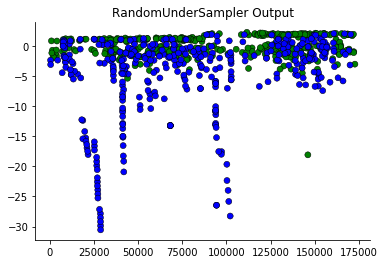

In [14]:

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X_train, Y_train)
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)
colors = ['green' if v == 0 else 'blue' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output")
pass

# RandomOverSampler

Text(0.5,1,'RandomOverSampler Output')

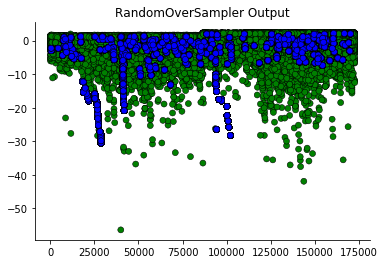

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, Y_train)
X_reosampled, y_reosampled = ros.fit_resample(X_train, Y_train)
colors = ['green' if v == 0 else 'blue' if v == 1 else '#67a9cf' for v in y_reosampled]
plt.scatter(X_reosampled[:, 0], X_reosampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output")

# 1-RandomForestClassifier¶

Random Forest est un algorithme d’apprentissage automatique flexible et facile à utiliser qui produit, même sans réglage hyper-paramètre, un résultat optimal la plupart du temps. C'est également l'un des algorithmes les plus utilisés, car il est simple et peut être utilisé à la fois pour des tâches de classification et de régression https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd

In [32]:
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
#import lightgbm as lgb
#from lightgbm import LGBMClassifier
#import xgboost as xgb

In [62]:
RANDOM_STATE = 2018
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

- RandomForestClassifier Avec les données iniatles

In [66]:
RFC1 = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [67]:
#Randomforest avec initial
RFC1.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=2018, verbose=False,
            warm_start=False)

In [78]:
predictrfc1 = RFC1.predict(X_valid)
print("L' AUC est :" + str(roc_auc_score(Y_valid, predictrfc1)))

L' AUC est :0.884973620344


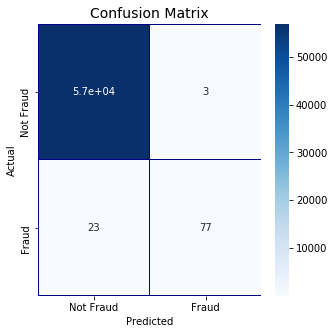

In [79]:
cm = pd.crosstab(Y_valid, predictrfc1, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

- RandomForestClassifier Avec Under Sampling

In [81]:
RFC2 = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [82]:
#Randomforest avec under sampling
RFC2.fit(X_resampled, y_resampled )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=2018, verbose=False,
            warm_start=False)

In [84]:
predictrfc2 = RFC2.predict(X_valid)
print("L' AUC est :" + str(roc_auc_score(Y_valid, predictrfc2)))

L' AUC est :0.923600647181


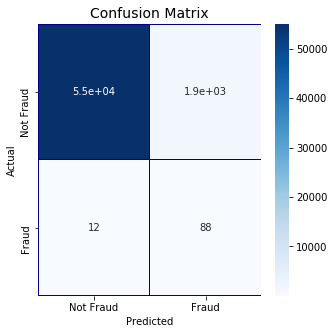

In [85]:
cm = pd.crosstab(Y_valid, predictrfc2, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

- RandomForestClassifier Avec Over Sampling

In [93]:
RFC3 = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [94]:
RFC3.fit(X_reosampled, y_reosampled )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=2018, verbose=False,
            warm_start=False)

In [95]:
predictrfc3 = RFC3.predict(X_valid)
print("L' AUC est :" + str(roc_auc_score(Y_valid, predictrfc3)))

L' AUC est :0.889947240688


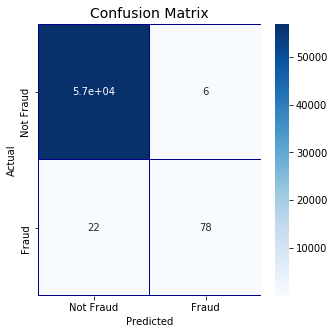

In [96]:
cm = pd.crosstab(Y_valid, predictrfc3, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# 2-AdaBoostClassifier

AdaBoostClassifier est un méta-estimateur qui commence par ajuster un classifieur sur le jeu de données d'origine, puis ajuste des copies supplémentaires du classifieur sur le même jeu de données, mais où les pondérations des instances mal classées sont ajustées de sorte que les classificateurs suivants se concentrent davantage sur cas difficiles.
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [16]:
from sklearn.ensemble import AdaBoostClassifier

NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier

- AdaBoost avec les données initail

In [17]:
 adb1 = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [18]:

adb1.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.8, n_estimators=100, random_state=2018)

In [21]:
predictadb1 = adb1.predict(X_valid)
print("L' AUC est :" + str(roc_auc_score(Y_valid, predictadb1)))

L' AUC est :0.854885688157


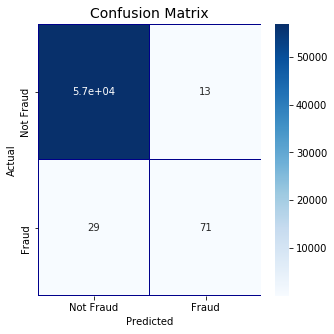

In [22]:
cm = pd.crosstab(Y_valid, predictadb1, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

- Randomforest avec under sampling

In [23]:
adb2 = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [24]:

adb2.fit(X_resampled, y_resampled )

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.8, n_estimators=100, random_state=2018)

In [25]:
predictadb2 = adb2.predict(X_valid)
print("L' AUC est :" + str(roc_auc_score(Y_valid, predictadb2)))

L' AUC est :0.925897787626


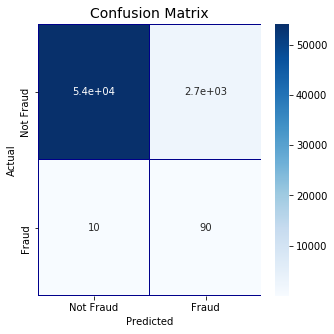

In [26]:
cm = pd.crosstab(Y_valid, predictadb2, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

- Randomforest avec over sampling

In [27]:
adb3 = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [28]:
adb3.fit(X_reosampled, y_reosampled )

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.8, n_estimators=100, random_state=2018)

In [29]:
predictadb3 = adb3.predict(X_valid)
print("L' AUC est :" + str(roc_auc_score(Y_valid, predictadb3)))

L' AUC est :0.940049417889


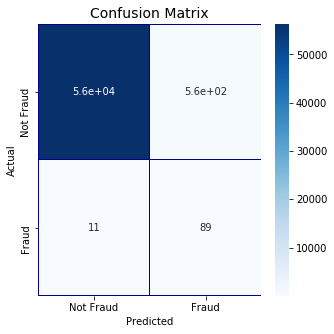

In [30]:
cm = pd.crosstab(Y_valid, predictadb3, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# 3- CatBoostClassifier

https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_catboostclassifier-docpage/

In [47]:
from catboost import CatBoostClassifier
VERBOSE_EVAL = 50 #Print out metric result

- CatBoostClassifier avec les données initiales

In [48]:
ctb1 = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [37]:
ctb1.fit(X_train, Y_train)

0:	total: 1.35s	remaining: 11m 13s
50:	total: 48.5s	remaining: 7m 7s
100:	total: 1m 34s	remaining: 6m 12s
150:	total: 2m 19s	remaining: 5m 21s
200:	total: 3m 2s	remaining: 4m 31s
250:	total: 3m 46s	remaining: 3m 44s
300:	total: 4m 30s	remaining: 2m 58s
350:	total: 5m 14s	remaining: 2m 13s
400:	total: 6m	remaining: 1m 28s
450:	total: 6m 44s	remaining: 43.9s
499:	total: 7m 27s	remaining: 0us


In [38]:
predictactb1 = adb1.predict(X_valid)
print("L' AUC est :" + str(roc_auc_score(Y_valid, predictactb1)))

L' AUC est :0.854885688157


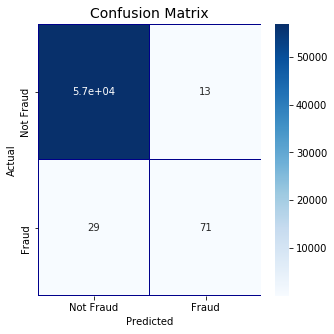

In [39]:
cm = pd.crosstab(Y_valid, predictactb1, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

- CatBoostClassifier avec under sampling

In [40]:
ctb2 = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [41]:
ctb2.fit(X_resampled, y_resampled )

0:	total: 3.41s	remaining: 28m 22s
50:	total: 2m 47s	remaining: 24m 33s
100:	total: 5m 23s	remaining: 21m 16s
150:	total: 8m 11s	remaining: 18m 56s
200:	total: 10m 48s	remaining: 16m 4s
250:	total: 13m 33s	remaining: 13m 27s
300:	total: 16m 9s	remaining: 10m 41s
350:	total: 18m 56s	remaining: 8m 2s
400:	total: 21m 40s	remaining: 5m 21s
450:	total: 24m 33s	remaining: 2m 40s
499:	total: 27m 17s	remaining: 0us


In [42]:
predictactb2 = ctb2.predict(X_valid)
print("L' AUC est :" + str(roc_auc_score(Y_valid, predictactb2)))

L' AUC est :0.934365657205


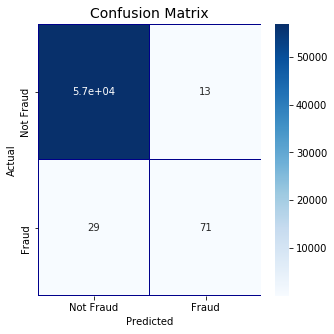

In [43]:
cm = pd.crosstab(Y_valid, predictactb1, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

- CatBoostClassifier avec Over sampling

In [44]:
ctb3 = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [45]:
ctb3.fit(X_reosampled, y_reosampled )

0:	total: 1.37s	remaining: 11m 22s
50:	total: 1m 8s	remaining: 9m 59s
100:	total: 2m 16s	remaining: 8m 58s
150:	total: 3m 18s	remaining: 7m 39s
200:	total: 4m 18s	remaining: 6m 24s
250:	total: 5m 20s	remaining: 5m 18s
300:	total: 6m 22s	remaining: 4m 13s
350:	total: 7m 24s	remaining: 3m 8s
400:	total: 8m 27s	remaining: 2m 5s
450:	total: 9m 29s	remaining: 1m 1s
499:	total: 10m 32s	remaining: 0us


In [49]:
predictactb3 = ctb3.predict(X_valid)
print("L' AUC est :" + str(roc_auc_score(Y_valid, predictactb3)))

L' AUC est :0.914894481376


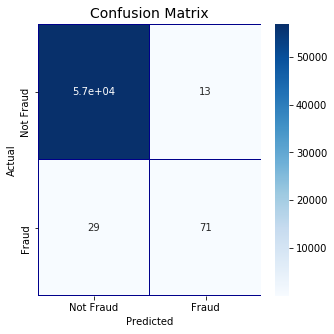

In [50]:
cm = pd.crosstab(Y_valid, predictactb1, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# 4-XGboost

https://xgboost.readthedocs.io/en/latest/build.html

In [73]:
import xgboost as xgb

- XGboost avec les données initiales

In [74]:
# Prepare the train and valid datasets
dtrain1 = xgb.DMatrix(X_train, Y_train)
dvalid = xgb.DMatrix(X_valid, Y_valid)
dtest = xgb.DMatrix(X_test, Y_test)
MAX_ROUNDS = 1000 #lgb iterations
#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain1, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [75]:

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

In [62]:
model = xgb.train(params, 
                dtrain1, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.873582	valid-auc:0.854851
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.924521	valid-auc:0.919709
[100]	train-auc:0.934953	valid-auc:0.928547
[150]	train-auc:0.974773	valid-auc:0.949442
[200]	train-auc:0.989059	valid-auc:0.968112
[250]	train-auc:0.992352	valid-auc:0.973553
[300]	train-auc:0.994292	valid-auc:0.974929
[350]	train-auc:0.995384	valid-auc:0.9759
[400]	train-auc:0.996304	valid-auc:0.976564
Stopping. Best iteration:
[375]	train-auc:0.995912	valid-auc:0.977



- XGboost avec under sampling

In [80]:
# Prepare the train and valid datasets
dtrain2 = xgb.DMatrix(X_resampled, y_resampled )
dvalid = xgb.DMatrix(X_valid, Y_valid)
dtest = xgb.DMatrix(X_test, Y_test)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain1, 'train'), (dtest, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [81]:
model2 = xgb.train(params, 
                dtrain1, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.873582	valid-auc:0.854851
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.924521	valid-auc:0.919709
[100]	train-auc:0.934953	valid-auc:0.928547
[150]	train-auc:0.974773	valid-auc:0.949442
[200]	train-auc:0.989059	valid-auc:0.968112
[250]	train-auc:0.992352	valid-auc:0.973553
[300]	train-auc:0.994292	valid-auc:0.974929
[350]	train-auc:0.995384	valid-auc:0.9759
[400]	train-auc:0.996304	valid-auc:0.976564
Stopping. Best iteration:
[375]	train-auc:0.995912	valid-auc:0.977



- XGboost avec under sampling

In [78]:
# Prepare the train and valid datasets
dtrain3 = xgb.DMatrix(X_reosampled, y_reosampled )

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain3, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [82]:
model3 = xgb.train(params, 
                dtrain1, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.873582	valid-auc:0.854851
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.924521	valid-auc:0.919709
[100]	train-auc:0.934953	valid-auc:0.928547
[150]	train-auc:0.974773	valid-auc:0.949442
[200]	train-auc:0.989059	valid-auc:0.968112
[250]	train-auc:0.992352	valid-auc:0.973553
[300]	train-auc:0.994292	valid-auc:0.974929
[350]	train-auc:0.995384	valid-auc:0.9759
[400]	train-auc:0.996304	valid-auc:0.976564
Stopping. Best iteration:
[375]	train-auc:0.995912	valid-auc:0.977



# CONCLUSION

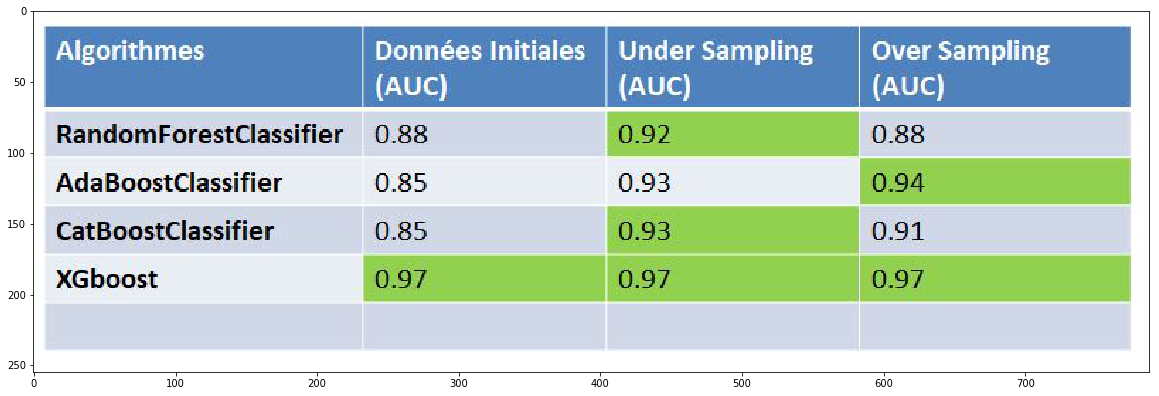

In [92]:
import matplotlib.image as mpimg
plt.figure(figsize=(20,10))
img=mpimg.imread('algo_ml.JPG')
imgplot = plt.imshow(img)
plt.show()

Pour conclure, nous comprenons l’importance des traitements utilisés pour les « imbalanced data » qui nous ont permis d’avoir des résultats beaucoup plus performants que sur les données initiales.
Les différents algorithmes ont été dans l’ensemble plutôt performants, l’algorithme de XHBOOST quant à lui était le meilleur avec 0.97 d’AUC pour les deux types de Sampling. De plus, AdaboostClassifier a aussi la meilleure spécificité, qui est la mesure pour détecter le taux de vrais négatifs, dans notre cas les fraudes, ce qui est le plus important pour un système censé détecter les fraudes. Il vaut mieux détecter une fraude qui n’en est pas une que l’inverse.   

# FD###############FIN####################FIN####################FD